### News Mood
In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: BBC, CBS, CNN, Fox, and New York times.

#### The first plot will be and/or feature the following:

Be a scatter plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
Each plot point will reflect the compound sentiment of a tweet.
Sort each plot point by its relative timestamp.

The second plot will be a bar plot visualizing the overall sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, seaborn, textblob, and VADER.



Your final Jupyter notebook must:

    Pull last 100 tweets from each outlet.
    Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
    Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
    Export the data in the DataFrame into a CSV file.
    Save PNG images for each plot.

As final considerations:

Use the Matplotlib and Seaborn libraries.
Include a written description of three observable trends based on the data.
Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
Include an exported markdown version of your Notebook called README.md in your GitHub repository.

In [2]:
# Imports
import tweepy
import json
import test_environment
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pylab
from datetime import datetime

ImportError: cannot import name 'pylab'

In [3]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
from test_environment import consumer_key, consumer_secret, access_token, access_token_secret

In [5]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [24]:
# Target User
target_user = ["CNN", "CBSNews", "BBC", "Fox", "nytimes"]
# target_user = ["CNN"]

In [25]:
analysis = []
for user in target_user:
    # Get 100 tweets from home feed
    public_tweets = api.user_timeline(user, count=100)
    
    tweets = []
    times = []    
    
    for tweet in public_tweets:
        tweet_text = tweet["text"]
        timestamp = datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")
        tweets.append((tweet_text, timestamp))
        
    for tweet_text, timestamp in tweets:
        results = analyzer.polarity_scores(tweet_text)
        results["tweet"] = tweet_text
        results["time"] = timestamp
        results["source"] = user
        analysis.append(results)


In [26]:
df = pd.DataFrame(analysis)

In [27]:
df.sort_values("time")

,compound,neg,neu,pos,source,time,tweet
399,0.0000,0.000,1.000,0.000,Fox,2018-05-24 00:34:21+00:00,RT @mspowahs: shoutout to @ConfabEvents for un...
398,0.8588,0.000,0.424,0.576,Fox,2018-05-24 00:57:40+00:00,@andymcmillan always a pleasure and thank YOU! 😇
397,0.0000,0.000,1.000,0.000,Fox,2018-05-24 02:36:02+00:00,@the_patima I need to be there
396,0.6369,0.000,0.792,0.208,Fox,2018-05-24 06:10:57+00:00,This interview perfectly illustrates how far w...
395,0.5574,0.000,0.825,0.175,Fox,2018-05-24 06:32:31+00:00,Just sent the 18th issue of @perfemail includi...
394,-0.8160,0.483,0.517,0.000,Fox,2018-05-24 07:04:49+00:00,"@jenistyping it hurts to read this, so painful..."
393,0.0000,0.000,1.000,0.000,Fox,2018-05-24 07:14:41+00:00,FRONT-END DEVELOPMENT IS ENGINEERING. Sing wit...
392,0.4927,0.000,0.811,0.189,Fox,2018-05-24 10:16:27+00:00,"RT @ChloeCondon: Hey y’all, I want to be very ..."
391,0.0387,0.122,0.788,0.090,Fox,2018-05-24 21:39:40+00:00,RT @berlinjs: Performance is critical for succ...
390,0.0000,0.000,1.000,0.000,Fox,2018-05-24 21:54:41+00:00,@superhighfives the world needs more of the ho...


In [31]:
# target_user = ["CNN", "CBS", "BBC", "Fox", "nytimes"]
cnn = df[df["source"]=="CNN"]
# the above is filtering. if the source is cnn, it will return a true. if true, then keep row.
cbs = df[df["source"]=="CBSNews"]
bbc = df[df["source"]=="BBC"]
fox = df[df["source"]=="Fox"]
nyt = df[df["source"]=="nytimes"]


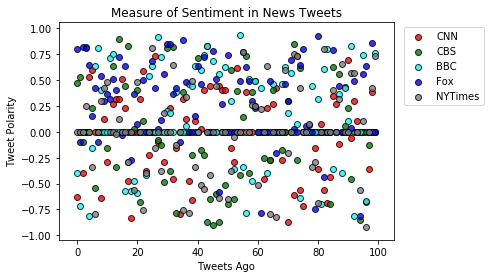

In [32]:
# Plotting the value of the polarity per tweet
plt.scatter(x=range(len(cnn)), y=cnn["compound"], c="red", label="CNN", edgecolors='k',
                  alpha=.8)
plt.scatter(x=range(len(cbs)), y=cbs["compound"], c="green", label="CBS", edgecolors='k',
                  alpha=.8)
plt.scatter(x=range(len(bbc)), y=bbc["compound"], c="cyan", label="BBC", edgecolors='k',
                  alpha=.8)
plt.scatter(x=range(len(fox)), y=fox["compound"], c="blue", label="Fox", edgecolors='k',
                  alpha=.8)
plt.scatter(x=range(len(nyt)), y=nyt["compound"], c="grey", label="NYTimes", edgecolors='k',
                  alpha=.8)

# Set a Title, axis labels, legend
plt.title("Measure of Sentiment in News Tweets")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

pylab.legend(loc=9, bbox_to_anchor=(1.15, 1))
plt.savefig('sentiment_scatter.png')

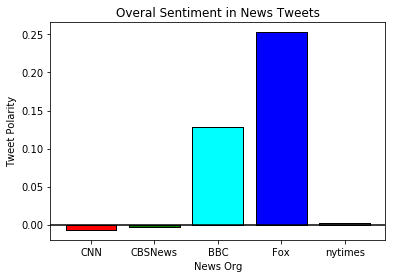

In [33]:
plt.bar(x=cnn["source"], height=cnn["compound"].mean(), color="red", label="CNN", edgecolor="black")
plt.bar(x=cbs["source"], height=cbs["compound"].mean(), color="green", label="CBS", edgecolor="black")
plt.bar(x=bbc["source"], height=bbc["compound"].mean(), color="cyan", label="BBC", edgecolor="black")
plt.bar(x=fox["source"], height=fox["compound"].mean(), color="blue", label="Fox", edgecolor="black")
plt.bar(x=nyt["source"], height=nyt["compound"].mean(), color="grey", label="NYTimes", edgecolor="black")

# Set a Title, axis labels, legend
plt.title("Overal Sentiment in News Tweets")
plt.xlabel("News Org")
plt.ylabel("Tweet Polarity")
plt.axhline(y=0, c="black")

#output image
plt.savefig('sentiment_bar.png')

# Challenge

In [34]:
# pd.DataFrame({
#     "compound": [],
#     "source": [],
#     "time": [],
#     "tweet": []
# })

,compound,source,time,tweet


In [35]:
df.to_csv("df_output_sentiment", encoding='utf-8')


### Observations:

- Observation 1: According to the bar chart, over the last 100 tweets, CNN tweeted the most "negative" tweets.
- Observation 2: Overall, the vast majority of the last 100 tweets were surprisingly "positive".
- Observation 3: The scatter plot also seems to support having mostly neutral or positive sentiment in tweets. There are definitely more dots on or above the x-axis.